Project Objective: 
To predict the next 30 days of Google’s open and close stock prices using historical stock market data, by analyzing time-based patterns and trends (e.g. price movements, volume, volatility) from past trading days.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, precision_score, recall_score


df = pd.read_csv("Google_Stock_Price.csv")

In [3]:

print("🔹 First 5 rows:")
print(df.head(), "\n")

print("🔹 Columns:")
print(df.columns, "\n")

print("🔹 Info:")
print(df.info(), "\n")


🔹 First 5 rows:
  symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0   

🔹 Column

In [4]:
# 3. Check for missing values
print("🔹 Missing Values per Column:")
print(df.isnull().sum(), "\n")


🔹 Missing Values per Column:
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64 



In [5]:

print("🔹 Summary Statistics:")
print(df.describe(include='all'))


🔹 Summary Statistics:
       symbol                       date        close         high  \
count    1258                       1258  1258.000000  1258.000000   
unique      1                       1258          NaN          NaN   
top      GOOG  2016-06-14 00:00:00+00:00          NaN          NaN   
freq     1258                          1          NaN          NaN   
mean      NaN                        NaN  1216.317067  1227.430934   
std       NaN                        NaN   383.333358   387.570872   
min       NaN                        NaN   668.260000   672.300000   
25%       NaN                        NaN   960.802500   968.757500   
50%       NaN                        NaN  1132.460000  1143.935000   
75%       NaN                        NaN  1360.595000  1374.345000   
max       NaN                        NaN  2521.600000  2526.990000   

                low         open        volume     adjClose      adjHigh  \
count   1258.000000  1258.000000  1.258000e+03  1258.000000  

In [6]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [7]:

df = df.sort_values('date')
df = df.reset_index(drop=True)


print("🔹 Sorted by Date:")
print(df.head())


🔹 Sorted by Date:
  symbol                      date   close    high       low    open   volume  \
0   GOOG 2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48  1306065   
1   GOOG 2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00  1214517   
2   GOOG 2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91  1982471   
3   GOOG 2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65  3402357   
4   GOOG 2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77  2082538   

   adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  splitFactor  
0    718.27   722.47  713.1200   716.48    1306065      0.0          1.0  
1    718.92   722.98  717.3100   719.00    1214517      0.0          1.0  
2    710.36   716.65  703.2600   714.91    1982471      0.0          1.0  
3    691.72   708.82  688.4515   708.65    3402357      0.0          1.0  
4    693.71   702.48  693.4100   698.77    2082538      0.0          1.0  



🔹 Plotting Adjusted Close Over Time


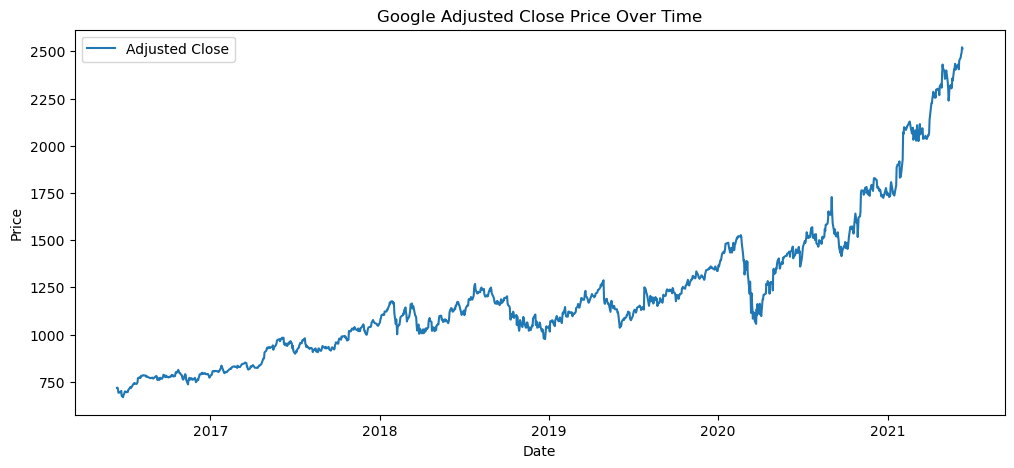

In [8]:

print("\n🔹 Plotting Adjusted Close Over Time")

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['adjClose'], label='Adjusted Close')
plt.title("Google Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


🔹 Plotting Moving Averages


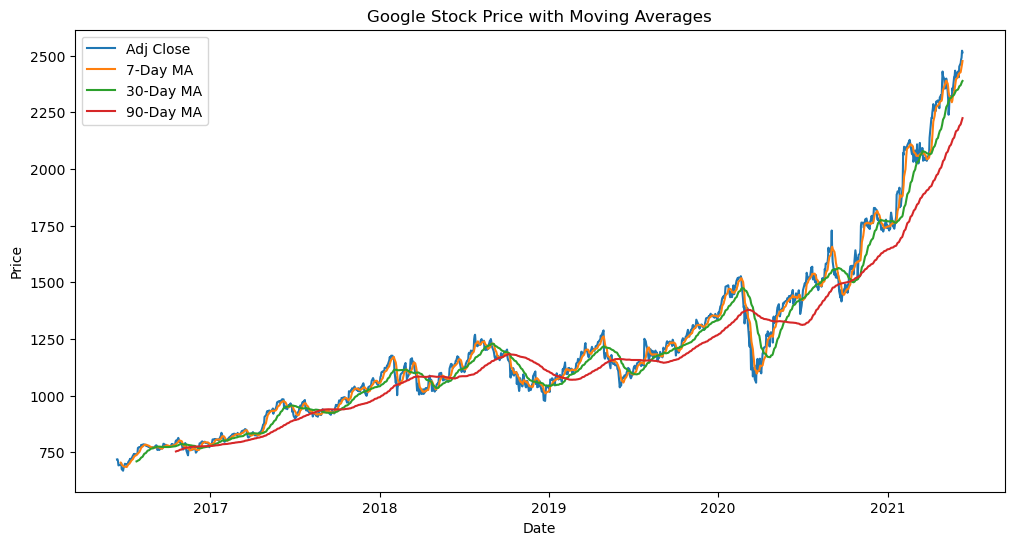

In [9]:
df['MA_7'] = df['adjClose'].rolling(window = 7).mean()
df['MA_30'] = df['adjClose'].rolling(window = 30).mean()
df['MA_90'] = df['adjClose'].rolling(window = 90).mean()

print("\n🔹 Plotting Moving Averages")
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['adjClose'], label='Adj Close')
plt.plot(df['date'], df['MA_7'], label='7-Day MA')
plt.plot(df['date'], df['MA_30'], label='30-Day MA')
plt.plot(df['date'], df['MA_90'], label='90-Day MA')
plt.title("Google Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()





🔹 Plotting Rolling Volatility


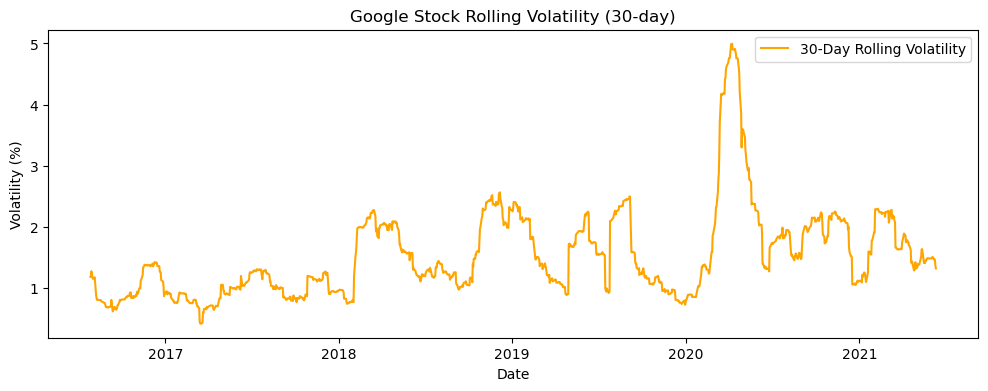

In [10]:
df['daily_return'] = df['adjClose'].pct_change() * 100
df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()


print("\n🔹 Plotting Rolling Volatility")
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['rolling_volatility'], label='30-Day Rolling Volatility', color='orange')
plt.title("Google Stock Rolling Volatility (30-day)")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.show()



In [11]:
exp1 = df['adjClose'].ewm(span=12, adjust=False).mean()
exp2 = df['adjClose'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2

delta = df['adjClose'].diff()
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

df['BB_MA20'] = df['adjClose'].rolling(window=20).mean()
df['BB_Upper'] = df['BB_MA20'] + 2 * df['adjClose'].rolling(window=20).std()
df['BB_Lower'] = df['BB_MA20'] - 2 * df['adjClose'].rolling(window=20).std()


df['lag_1'] = df['adjClose'].shift(1)
df['lag_3'] = df['adjClose'].shift(3)
df['lag_7'] = df['adjClose'].shift(7)

In [13]:

df['target_price'] = df['adjClose'].shift(-1)
print(df['adjClose'].head())
print(df['target_price'].head())

df['target_direction'] = (df['target_price'] > df['adjClose']).astype(int)

features = ['adjClose', 'MA_7', 'MA_30', 'MA_90', 'MACD', 'RSI', 'BB_MA20', 'lag_1', 'lag_3', 'lag_7']
df = df.dropna()

X = df[features]
y_reg = df['target_price']
y_clf = df['target_direction']

X_train, X_test = X[:-200], X[-200:]
y_train_reg, y_test_reg = y_reg[:-200], y_reg[-200:]
y_train_clf, y_test_clf = y_clf[:-200], y_clf[-200:]

reg = LinearRegression()
reg.fit(X_train, y_train_reg)
y_pred_reg = reg.predict(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train_clf)
y_pred_clf = clf.predict(X_test)

89    801.56
90    796.97
91    799.37
92    813.11
93    807.67
Name: adjClose, dtype: float64
89    796.97
90    799.37
91    813.11
92    807.67
93    799.07
Name: target_price, dtype: float64


In [41]:
print("\n🔹 Regression Metrics")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE:", mean_squared_error(y_test_reg, y_pred_reg, squared=False))

print("\n🔹 Classification Metrics")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Precision:", precision_score(y_test_clf, y_pred_clf))
print("Recall:", recall_score(y_test_clf, y_pred_clf))

print("\n🔹 Feature Importances (Classifier):")
importances = clf.feature_importances_
for f, i in zip(features, importances):
    print(f"{f}: {i:.4f}")


🔹 Regression Metrics
MAE: 25.76412714765082
MSE: 1226.8686384584332
RMSE: 35.02668466267445

🔹 Classification Metrics
Accuracy: 0.505
Precision: 0.5888888888888889
Recall: 0.4608695652173913

🔹 Feature Importances (Classifier):
adjClose: 0.1018
MA_7: 0.0926
MA_30: 0.0895
MA_90: 0.1018
MACD: 0.1025
RSI: 0.1159
BB_MA20: 0.0910
lag_1: 0.1090
lag_3: 0.0971
lag_7: 0.0988


/Applications/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


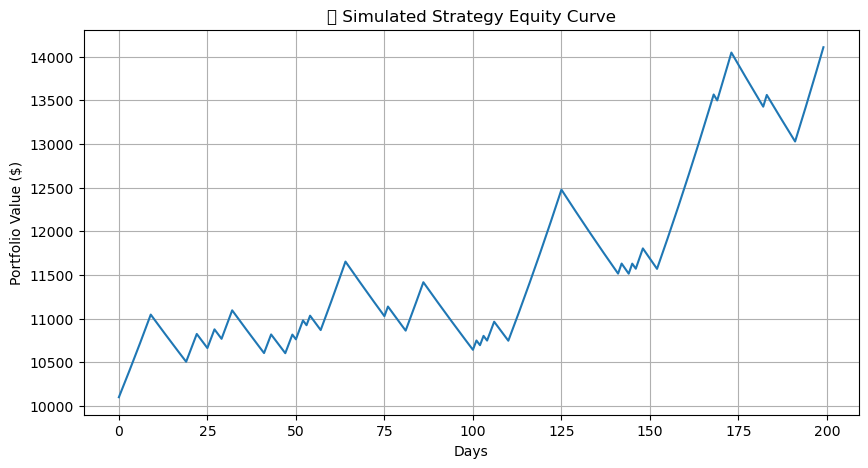

In [42]:
capital = 10000
values = []

for actual, pred in zip(df['adjClose'].iloc[-200:], y_pred_clf):
    if pred == 1:
        capital *= 1.01 
    else:
        capital *= 0.995  
    values.append(capital)

plt.figure(figsize=(10, 5))
plt.plot(values)
plt.title("📈 Simulated Strategy Equity Curve")
plt.xlabel("Days")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.show()